In [1]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
dfPitloc = pd.read_excel('Pitloc.xlsx')
dfPitloc.head()
dfPitloc.drop([i for i in dfPitloc.columns if i not in ['id', 'xloc','yloc', 'zloc']], axis=1, inplace = True)
dfPitloc.head()

,id,xloc,yloc,zloc
0,BOT,28497,82023,4500.000000
1,C-ENTRENAMIENTO,28419,79699,4603.000000
2,CAPELLA,0,76000,4837.200195
3,CO01,38394,79907,4365.100098
4,CS01,38309,79873,4367.200195


In [3]:
Coordenadas = {}
for index, row in dfPitloc.iterrows():
    #Coordenadas[row[0]] = {'xloc': row[1], 'yloc': row[2], 'zloc': row[3]}
    Coordenadas[row[0]] = {'pos':(row[1], row[2]) }

In [4]:
df = pd.read_excel('Travel.xlsx')
df.columns = df .iloc[0]
df.drop(0, inplace = True)

In [5]:
df.head()

,ddbkey,id,locstart,locend,xgraph,ygraph,dist,timeempty,timeloaded,closed,factor,street,resist
1,1411328,000EBC18,C-ENTRENAMIENTO,NR216,<array>,<array>,477,52,94,0,100,NaN,0
2,1411482,000EBDCC,CO01,NU58,<array>,<array>,46,10,23,0,100,NaN,0
3,1411636,000EBEA6,CS01,NU41,<array>,<array>,78,14,13,0,100,NaN,0
4,1411790,000EBF80,CS03,NR347,<array>,<array>,58,10,12,0,100,NaN,0
5,1411944,000EBF80,CS03,NR353,<array>,<array>,48,11,15,0,100,NaN,0


In [6]:
Arcos = []
for index, row in df.iterrows():
    Arcos.append([row[2], row[3], row[7], row[8], row[9], row[6]])

In [7]:
%matplotlib notebook
G = nx.DiGraph()
contar = 0
for edge in Arcos:
    if edge[4] == 0:
        G.add_edge(edge[0], edge[1], time_empty = edge[2], time_loaded = edge[3], color = 'b')
    else:
        contar +=1
        G.add_edge(edge[0], edge[1], time_empty = edge[2], time_loaded = edge[3], color = 'r')
'-----------------------------------------------------------------------------------------------------'
SCC = [len(i) for i in nx.strongly_connected_components(G)]
'-----------------------------------------------------------------------------------------------------'
nx.is_strongly_connected(G)
nx.set_node_attributes(G, Coordenadas)
Nodos = list(G.nodes())
colors = [G[u][v]['color'] for u,v in G.edges]
print("Arcos cerrados: {}".format(contar))

Arcos cerrados: 183


<IPython.core.display.Javascript object>


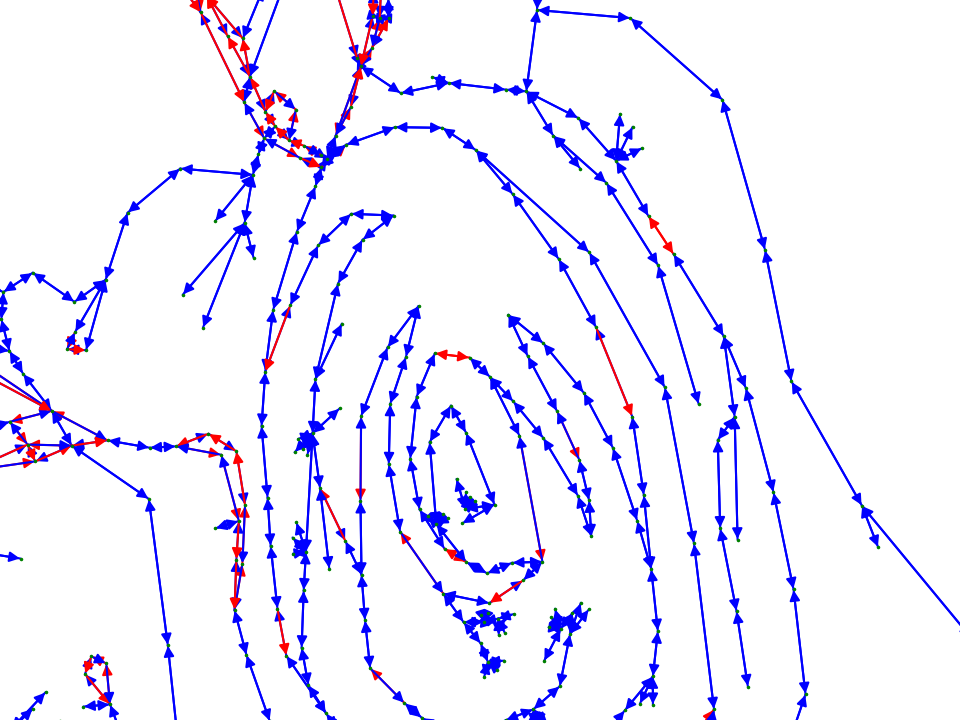

In [18]:
%matplotlib notebook
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=0.5, node_color = 'g',edge_color = colors, weight = 'time_loaded')

In [9]:
SCC = [len(i) for i in nx.strongly_connected_components(G)]
largest = max(nx.strongly_connected_components(G), key=len)

<IPython.core.display.Javascript object>


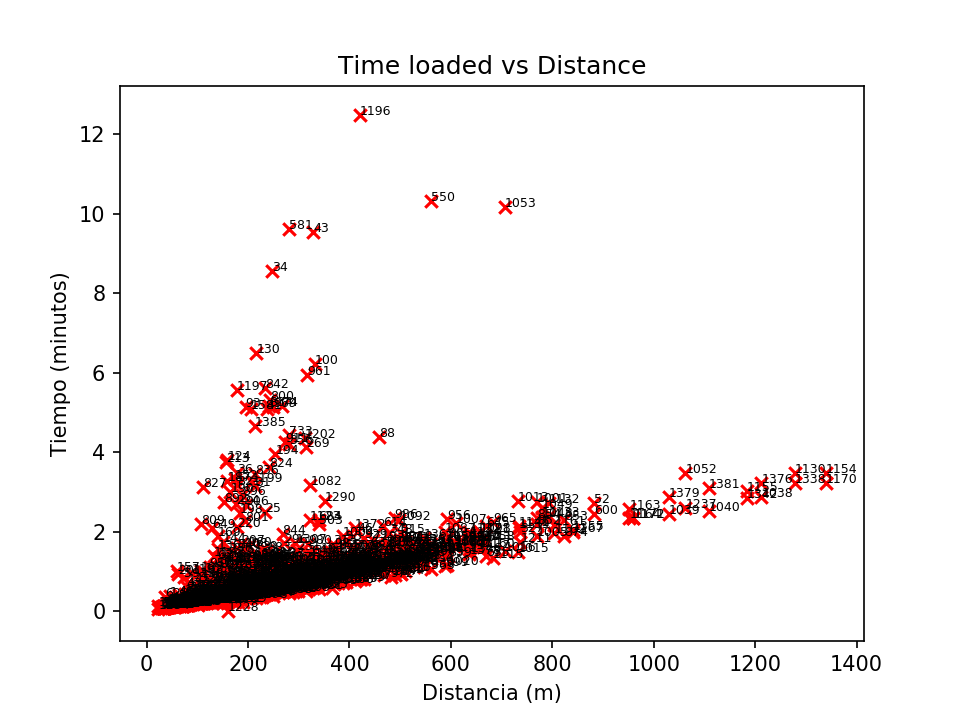

In [15]:
%matplotlib notebook
nombres = [i for i in range(len(Arcos))]
x_coords = [arco[5] for arco in Arcos]
y_coords = [arco[3]/60 for arco in Arcos]
for i, nombre in enumerate(nombres):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, nombre, fontsize= 6)
plt.title("Time loaded vs Distance")
plt.xlabel('Distancia (m)')
plt.ylabel('Tiempo (minutos)')
plt.show()   

<IPython.core.display.Javascript object>


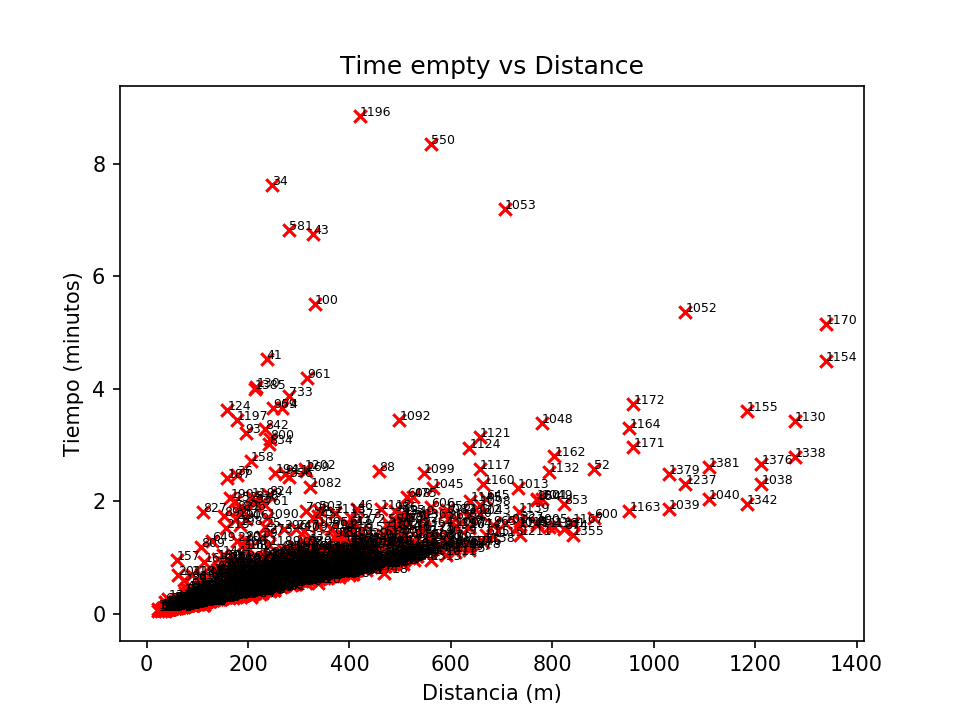

In [16]:
%matplotlib notebook
nombres = [i for i in range(len(Arcos))]
x_coords = [arco[5] for arco in Arcos]
y_coords = [arco[2]/60 for arco in Arcos]

for i, nombre in enumerate(nombres):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, nombre, fontsize = 6)
plt.title("Time empty vs Distance")
plt.xlabel('Distancia (m)')
plt.ylabel('Tiempo (minutos)')
plt.show()   

<IPython.core.display.Javascript object>


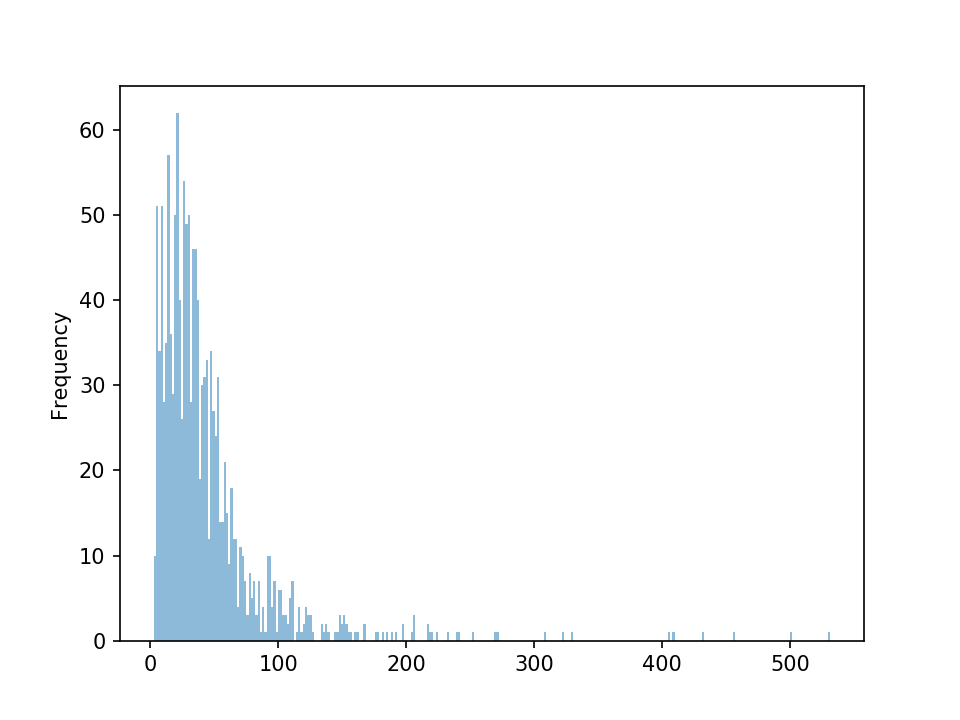

In [17]:
%matplotlib notebook
df['timeempty'].plot.hist(bins=300, alpha=0.5)

<IPython.core.display.Javascript object>


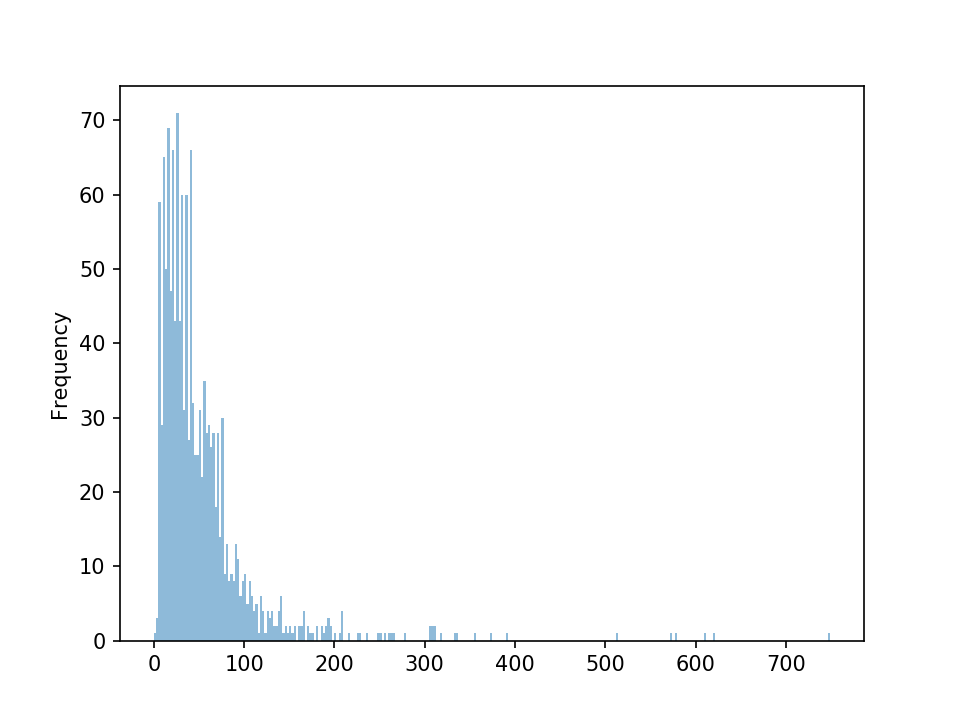

In [13]:
%matplotlib notebook
df['timeloaded'].plot.hist(bins=300, alpha=0.5)